## About Dataset

The dataset used consists of reviews of fine foods from amazon. The data spans a period of more than 10 years, including all 100,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. 

 [ Reviews Data Set from Kaggle](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews) .



In [102]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential  # Import the Sequential class from Keras
from keras.layers import Embedding, GRU, Dropout, Dense, LSTM  # Import other necessary layers

# Data cleaning and preparation

In [2]:
data = pd.read_csv('Amazon_Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,550064,B000CQIDJM,A3V5GKLFPFCLSE,A. Hidell,0,1,1,1301616000,Revolting,This tea is rather foul tasting (and smelling)...
1,370800,B0051S9Q9M,ADX3BCYGCCSVU,Patricia,0,0,1,1329955200,Turns to mush,I made a batch of this an ox muesli with 1/2 m...
2,90777,B006G7XV7A,A32RO4GQUUW2PO,From Wa to Ma,1,1,1,1294012800,Nasty,I lived in Renton Wa my whole life & loved eat...
3,407734,B005W48BQE,A5G8BKM4CT9XV,Jesse M.L.,1,2,1,1340928000,ehh... taste very watery,It taste like they put water in here. i prefe...
4,512303,B0025UNTYW,A18J4VE85L8NQN,karrepair,0,0,1,1339459200,salt and pepper,I order these for my daughter's upcoming weddi...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             99995 non-null   object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 100000 non-null  object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


In [7]:
data['Score'].value_counts()

1    50000
5    50000
Name: Score, dtype: int64

In [9]:
#Create a new column called 'Text length' which is the number of characters in the text column 

data['text length'] = data['Text'].apply(len)
data['text length']

0        212
1        225
2        419
3        203
4        152
        ... 
99995    263
99996    171
99997    283
99998    143
99999    461
Name: text length, Length: 100000, dtype: int64

# EDA

Exploring the data

In [10]:
len(data)

100000

<Axes: xlabel='Score', ylabel='text length'>

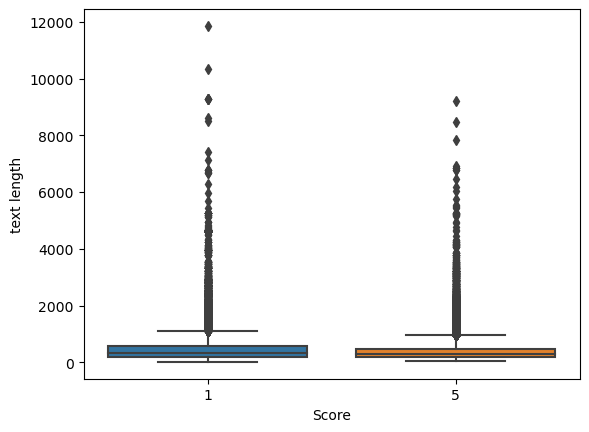

In [18]:
sns.boxplot(data,  x='Score', y ='text length')

In [20]:
#Converting score column to binary values - score 5 to 0 and leaving score 1 to be same as 1 

data['Score'] = np.where(data['Score'].values == 5,0,1)

In [24]:
data['Score'].value_counts()

1    50000
0    50000
Name: Score, dtype: int64

Data cleaning and preprocessing

In [38]:
#Data cleaning and preprocessing 

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    tokens = [token.lower() for token in tokens]

    tokens = [token for token in tokens if token.isalpha()]

    tokens = [token for token in tokens if token not in stop_words]

    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [39]:
data['cleaned'] = data.apply(lambda x:preprocess_text(x['Text']), axis = 1)

In [40]:
data.cleaned[0]

'tea rather foul tasting smelling taste like imagine cologne taste like smell sickly sweet nausea inducing love vanilla love chai love tea awful'

# Word Cloud

45011
['sellby', 'camano', 'kreuig', 'komforte', 'bentonville', 'fetal', 'capped', 'judie', 'tastykake', 'wrong']


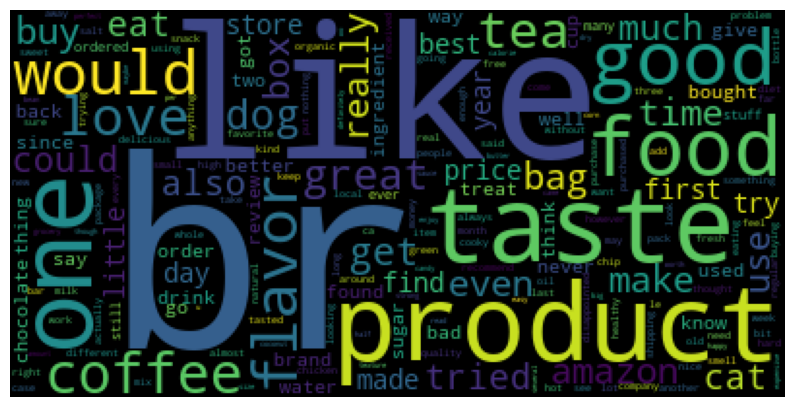

In [42]:
tokenized_doc = data['cleaned'].apply(lambda x: x.split())
all_terms = [item for sublist in tokenized_doc for item in sublist]

vocabulary = set(all_terms)
print(len(vocabulary))
print(list(vocabulary)[0:10])
frequency_dist = nltk.FreqDist(all_terms)
frequency_dist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned'], data['Score'], test_size=0.2, random_state=42)

In [52]:
#Create an instance of the TF-IDF vectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
X_train_vec

<80000x41126 sparse matrix of type '<class 'numpy.float64'>'
	with 2567375 stored elements in Compressed Sparse Row format>

# Building machine learning models : Naive Bayes, Logistic Regression 


In [57]:
Lgmodel = LogisticRegression()
Lgmodel.fit(X_train_vec, y_train)

C:\Users\oghal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_Lgpred = Lgmodel.predict(X_test_vec)
# Evaluate the performance of the classifier
LGaccuracy = metrics.accuracy_score(y_test, y_Lgpred)
f1_score = metrics.f1_score(y_test, y_Lgpred, average="macro")
print("Accuracy:", LGaccuracy)
print('F1 score:',f1_score )

Accuracy: 0.92495
F1 score: 0.9249457217185022


In [63]:
print(metrics.classification_report(y_test, y_Lgpred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9965
           1       0.92      0.93      0.93     10035

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [66]:
Nbmodel = MultinomialNB()
Nbmodel.fit(X_train_vec, y_train)

MultinomialNB()

In [68]:
Nby_pred = Nbmodel.predict(X_test_vec)

# Evaluate the performance of the classifier
NBaccuracy = metrics.accuracy_score(y_test, Nby_pred)
f1_score = metrics.f1_score(y_test, Nby_pred, average="macro")
print("Accuracy:", NBaccuracy)
print('F1 score:',f1_score )

Accuracy: 0.90445
F1 score: 0.9044498507028917


In [74]:
print(metrics.classification_report(y_test, Nby_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      9965
           1       0.91      0.90      0.90     10035

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [70]:
texts = list(X_train.values)
labels_orig = list(y_train.values)
labels = [i for i in labels_orig]

# Neural Network Models 


In [76]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

maxlen = 200  # We will cut reviews after 300 words
training_samples = 1500
validation_samples = 400  # We will be validating on these samples
max_words = 20000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 41150 unique tokens.
Shape of data tensor: (80000, 200)
Shape of label tensor: (80000,)


Split the training data into a training set and a validation set

In [78]:
# But first, shuffle the data, since we started from data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1500, 200)
(1500,)
(400, 200)
(400,)


Loading glove data into Jupyter notebppk, downloading it and unzipping it

In [81]:
import requests
import zipfile

# Define the URL for the GloVe data
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

# Define the file paths for the downloaded zip file and the target directory
zip_file_path = "glove.6B.zip"
target_dir = "glove.6B/"

# Download the GloVe zip file
response = requests.get(glove_url)
with open(zip_file_path, "wb") as file:
    file.write(response.content)

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

# Clean up: remove the zip file
import os
os.remove(zip_file_path)


In [82]:
import os
import numpy as np
embeddings_index = {}
f = open(os.path.join('glove.6B/glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [83]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [84]:
import pandas as pd
pd.DataFrame(embedding_matrix.T)

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,0.197880,-0.268700,0.128040,-0.246560,-0.22557,-0.164860,-0.030769,0.039741,-0.568740,...,0.008391,0.141160,0.120680,-0.097065,0.0,0.166840,-0.271560,0.0,-0.631930,0.091940
1,0.0,0.252650,0.817080,0.341310,0.287600,0.49418,0.919970,0.119930,0.035052,0.745050,...,-0.031545,1.342900,0.279260,-0.418850,0.0,-0.066841,-0.045512,0.0,0.062176,0.167970
2,0.0,-0.283080,0.698960,0.331060,0.563880,0.48610,0.227370,0.539090,0.329880,0.361320,...,-0.217420,-0.484600,0.558390,-0.392080,0.0,0.032496,0.145990,0.0,-0.617230,0.372530
3,0.0,-0.110950,-0.723410,-0.026678,0.121030,-0.43320,-0.490310,-0.436960,-0.587900,-0.285380,...,0.028052,1.211300,0.869470,-0.265050,0.0,-0.055776,0.205480,0.0,-0.684970,-0.519640
4,0.0,-0.733530,0.091566,-0.022675,-0.544320,0.13738,-0.001808,-0.739370,-0.250540,-0.046289,...,-0.584180,0.493590,-0.368820,0.106390,0.0,-0.796890,-0.029566,0.0,0.817580,-0.414510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,-0.581860,-0.464060,-0.219820,-0.086314,0.13784,-0.357760,0.169180,0.015973,-0.145090,...,0.093737,-0.444670,0.062539,-0.245130,0.0,0.580210,-0.713420,0.0,0.965310,-0.004133
96,0.0,0.049536,-0.414050,-0.208800,-0.465050,-0.34359,0.238990,-0.265730,0.284870,-0.624770,...,0.219310,-1.541600,-0.028650,0.514510,0.0,0.257250,0.688840,0.0,0.361230,-0.418800
97,0.0,-0.440630,-0.401100,-0.377280,-0.824630,-0.45744,-0.067904,-0.528780,-0.261370,-0.963100,...,-0.284220,-1.243600,-0.635290,-0.016500,0.0,-0.169270,-0.534400,0.0,-0.242770,-0.354490
98,0.0,-0.742650,0.746570,1.289900,0.322000,0.49646,1.507200,0.175840,0.554330,0.351040,...,-0.640250,0.017892,0.359440,0.003777,0.0,-0.404750,-0.556280,0.0,0.855840,-0.265390


In [85]:
embedding_matrix.shape

(20000, 100)

In [86]:
test_texts = list(X_test.values)
test_labels_orig = list(y_test.values)
test_labels = [i for i in test_labels_orig]

sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)

# Training deep learning models using GRU and LSTM networks 

In [89]:
from keras.layers import Dropout, GRU
from keras.optimizers import RMSprop

# Define optimizer with a custom learning rate
optimizer = RMSprop(learning_rate=0.001)

modelGRU2 = Sequential()
modelGRU2.add(Embedding(max_words, embedding_dim, input_length=maxlen, trainable=True))
modelGRU2.add(GRU(32))
modelGRU2.add(Dropout(0.5))
modelGRU2.add(Dense(32, activation='relu'))
modelGRU2.add(Dense(1, activation='sigmoid'))

modelGRU2.layers[0].set_weights([embedding_matrix])

# Use the custom optimizer in the compile method
modelGRU2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])
history = modelGRU2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))
modelGRU2.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
24/24 [==============================] - 9s 219ms/step - loss: 0.6869 - acc: 0.5400 - val_loss: 0.6551 - val_acc: 0.5950
Epoch 2/10
24/24 [==============================] - 3s 144ms/step - loss: 0.6607 - acc: 0.5840 - val_loss: 0.6264 - val_acc: 0.6600
Epoch 3/10
24/24 [==============================] - 4s 147ms/step - loss: 0.6020 - acc: 0.6800 - val_loss: 0.5766 - val_acc: 0.6950
Epoch 4/10
24/24 [==============================] - 4s 166ms/step - loss: 0.5450 - acc: 0.7473 - val_loss: 0.4949 - val_acc: 0.7625
Epoch 5/10
24/24 [==============================] - 4s 147ms/step - loss: 0.4641 - acc: 0.7900 - val_loss: 0.7440 - val_acc: 0.6500
Epoch 6/10
24/24 [==============================] - 3s 140ms/step - loss: 0.4218 - acc: 0.8260 - val_loss: 0.4616 - val_acc: 0.7900
Epoch 7/10
24/24 [==============================] - 3s 131ms/step - loss: 0.3620 - acc: 0.8453 - val_loss: 0.4129 - val_acc: 0.8150
Epoch 8/10
24/24 [==============================] - 3s 130ms/step - loss: 0.

In [90]:
modelGRU2.load_weights('pre_trained_glove_model.h5')
loss, accuracy = modelGRU2.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

625/625 [==============================] - 19s 30ms/step - loss: 0.4331 - acc: 0.8191
Test Loss: 0.4330528676509857
Test Accuracy: 0.8190500140190125


In [93]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

# Define optimizer with a custom learning rate
optimizer = RMSprop(learning_rate=0.001)

modelLSTM2 = Sequential()
modelLSTM2.add(Embedding(max_words, embedding_dim, input_length=maxlen, trainable=True))
modelLSTM2.add(LSTM(64))
modelLSTM2.add(Dropout(0.5))
modelLSTM2.add(Dense(32, activation='relu'))
modelLSTM2.add(Dense(1, activation='sigmoid'))

modelLSTM2.layers[0].set_weights([embedding_matrix])

# Use the custom optimizer in the compile method
modelLSTM2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])
history = modelLSTM2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
modelLSTM2.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
47/47 [==============================] - 12s 193ms/step - loss: 0.6704 - acc: 0.5773 - val_loss: 0.5976 - val_acc: 0.7050
Epoch 2/10
47/47 [==============================] - 7s 158ms/step - loss: 0.5368 - acc: 0.7373 - val_loss: 0.4616 - val_acc: 0.7800
Epoch 3/10
47/47 [==============================] - 7s 158ms/step - loss: 0.4196 - acc: 0.8127 - val_loss: 0.4664 - val_acc: 0.7925
Epoch 4/10
47/47 [==============================] - 7s 157ms/step - loss: 0.3841 - acc: 0.8393 - val_loss: 0.4266 - val_acc: 0.8050
Epoch 5/10
47/47 [==============================] - 8s 177ms/step - loss: 0.3142 - acc: 0.8753 - val_loss: 0.4449 - val_acc: 0.8225
Epoch 6/10
47/47 [==============================] - 8s 168ms/step - loss: 0.2577 - acc: 0.8987 - val_loss: 0.5801 - val_acc: 0.8025
Epoch 7/10
47/47 [==============================] - 8s 164ms/step - loss: 0.2293 - acc: 0.9160 - val_loss: 0.4807 - val_acc: 0.8100
Epoch 8/10
47/47 [==============================] - 7s 152ms/step - loss: 0

In [94]:
modelLSTM2.load_weights('pre_trained_glove_model.h5')
loss, accuracy = modelLSTM2.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

625/625 [==============================] - 37s 60ms/step - loss: 0.5032 - acc: 0.8397
Test Loss: 0.5031960606575012
Test Accuracy: 0.8397499918937683


# Comparing models 

In [98]:
import pandas as pd
models = {'Model':["LogesticModel","NBModel","modelGRU2","modelLSTM2"],
          'Result':[92,90,82,84]
}
result=pd.DataFrame.from_dict(models)
result.head(6)

,Model,Result
0,LogesticModel,92
1,NBModel,90
2,modelGRU2,82
3,modelLSTM2,84


### Findings:

The accuracy results from the different models used in this project provide valuable insights into the effectiveness of various text mining techniques for sentiment analysis on Amazon's food reviews.

1. **Logistic Regression Model**: 92% accuracy
2. **MultinomialNB Model**: 90% accuracy
3. **GRU Model**: 82% accuracy
4. **LSTM Model**: 84% accuracy


### Interpretation:

Logistic Regression and MultinomialNB Models: These models are relatively simple and fast to train. With accuracies of 92% and 90%, they show strong performance. This suggests that for the given task, even simpler models can extract useful patterns from the data.

LSTM and GRU Models: These are more complex, deep learning models, showing 84 and 82% accuracies respectively. The slightly lower accuracy than simpler models may indicate a need for more tuning or more data. It's a reminder that more complex doesn't always mean better.



### Implications for Business:

- **Problem Solution**: The project successfully addressed the goal of analyzing customer feedback on food reviews to derive actionable insights for restaurants. The high accuracy achieved by models like Logistic Regression and Multinomial NB indicate that these insights are reliable and can be trusted by restaurants to make informed decisions.

- **Trend Identification**: The success of different models shows the importance of choosing the right algorithm for specific business needs. The trend towards leveraging state-of-the-art models like BERT can drive even more accurate and insightful analytics products.

- **Potential Opportunities**: The models' performance may offer opportunities to create customized analytics products targeting specific aspects of customer feedback, enhancing restaurants' ability to cater to customer preferences and needs.

- **Challenges**: The underperformance of certain models (LSTM, GRU) indicates that there may still be room for improvement, requiring further experimentation, tuning, and potentially more data for training.

### Conclusion:

The results have provided a clear path for businesses to understand customer feedback and translate it into actionable strategies. The ability to pinpoint customer preferences and dissatisfaction areas with high accuracy allows for more targeted and effective interventions, ultimately contributing to customer satisfaction and business growth. It also highlights the importance of continuous innovation and the adoption of advanced text mining techniques to stay ahead in the competitive landscape.